# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.0 pandas==2.0.3 opencv-python==4.8.0.76 -q --user
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76

In [ ]:
!pip install nvidia-cublas-cu12==12.1.3.1 nvidia-cuda-cupti-cu12==12.1.105 nvidia-cuda-nvrtc-cu12==12.1.105 nvidia-cuda-runtime-cu12==12.1.105 nvidia-cudnn-cu12==8.9.2.26 nvidia-cufft-cu12==11.0.2.54 nvidia-curand-cu12==10.3.2.106 nvidia-cusolver-cu12==11.4.5.107 nvidia-cusparse-cu12==12.1.0.106 nvidia-nccl-cu12==2.19.3 nvidia-nvtx-cu12==12.1.105 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 11.4 MB/s eta 0:00:00


In [ ]:
!pip install typing-extensions==4.8.0 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.7.1 numpy==1.25.0 pandas==2.0.3 opencv-python==4.8.0.76 -q --user
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 2.1 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for matrix operations
import pandas as pd                                                                              # Importing pandas manipulate DataFrames
import matplotlib.pyplot as plt                                                                  # Importing matplotlib for plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

%matplotlib inline

#Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN models
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers for the models
from sklearn import preprocessing                                                                # Importing to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing to plot confusion matrices
from sklearn.metrics import classification_report                                                # Importing to plot classification reports for the models

#display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

from sklearn.preprocessing import LabelBinarizer                                                 # Labelbinarizer works similar to onehotencoder

from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#formating numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded to 2 decimal places


## Mounting Drive

In [ ]:
#mounting the Google drive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
#loading the dataset of images
path1 = "/Computer_Vision/Project/images.npy"
images = np.load(path1)

#loading the dataset of labels
path2 = "/Computer_Vision/Project/Labels.csv"
labels = pd.read_csv(path2)

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(type(images))

(4750, 128, 128, 3)
<class 'numpy.ndarray'>


**Observations:** The dataset contains 4750 RGB images of the shape 128x128 pixels, each containing 3 channels

In [ ]:
print(labels.shape)
print(type(labels))

(4750, 1)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
labels.sample(n=5)

,Label
1000,Shepherds Purse
4028,Black-grass
3975,Black-grass
121,Small-flowered Cranesbill
3763,Maize


## Exploratory Data Analysis

### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
#setting the figure size for the visualizations
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,10

#%matplotlib inline

In [ ]:
def labeled_barplot(data, x_feature,ylabel_text=None,xlabel_text=None,xtext_rotation=45):
  """
    Plotting the distribution of the number of each images 'Label'
  """
  rcParams['figure.figsize'] = 13,7

  ax = sns.countplot(data=data, x=x_feature, palette='viridis',hue=x_feature,legend=False, order = data[x_feature].value_counts().index)
  total = float(len(images))
  count = data[x_feature].nunique()

  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)

      x = p.get_x() + p.get_width()/2
      y = p.get_height() + 6

      ax.annotate(
            percentage,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0,3),
            textcoords="offset points",
        )  # annot

  ax.set_facecolor("white")
  ax.set_axisbelow(True)
  ax.yaxis.grid(color='silver', linestyle='solid')
  ax.bar(x,y,align="center",alpha=.5)


  if xlabel_text:
    ax.set(xlabel=xlabel_text)
  if ylabel_text:
    ax.set(ylabel=ylabel_text)


  plt.xticks(rotation=xtext_rotation,fontsize=8)
  #plt.figure(figsize=(37, 23))
  plt.show();

In [ ]:
def plot_images(images,labels):
  num_classes=12                                                                #setting the number of classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                    #obtaining the unique classes from labels
  rows = 3                                                                      #defining number of rows
  cols = 4                                                                      #defining number of columns
  fig = plt.figure(figsize=(15, 12))                                            #defining the figure size
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                      #generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                    #adding subplots
          ax.imshow(images[random_index, :])                                    #plotting the image
          ax.set_title(keys[random_index])
  plt.show()

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### Image Label

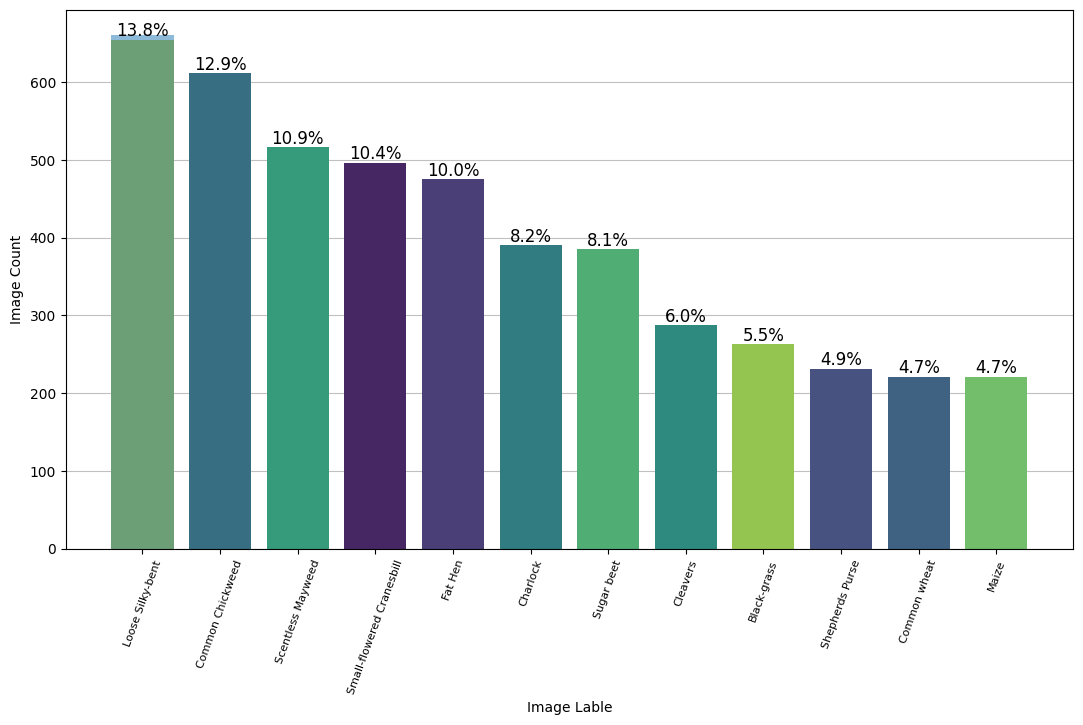

In [ ]:
labeled_barplot(labels,x_feature='Label',ylabel_text="Image Count",xlabel_text="Image Lable",xtext_rotation=70)


In [ ]:
#displaying different category plant images of each plant are in the dataset
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

**Observations**
* It observed that, 12 types of plants in the dataset
* Two plants, Loose Silky-bents and Common Chickweeds, collectively make up more than a quarter (~26%) of all images
* Due to the non-uniform distribution of image counts across plants, there's a risk of the CNN model overfitting to the more abundantly represented plants.
* This imbalance could lead the model to misclassify less-represented plants as more common ones that share similar characteristics such as shapes, colors, and other relevant traits.

### Random images

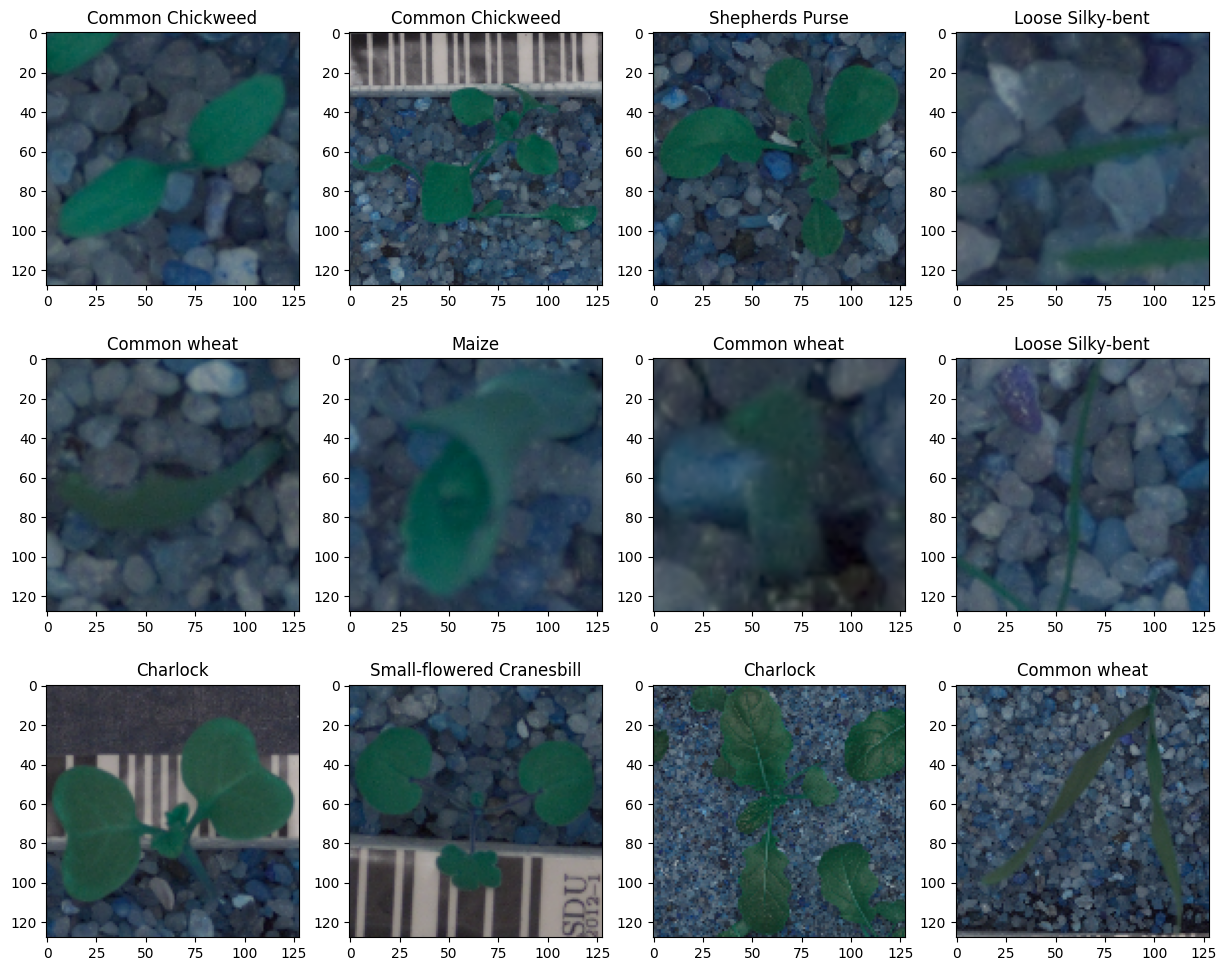

In [ ]:
#sample of 12 images from the dataset
plot_images(images,labels)

**Observations**:
* All of the plants appear to be various shapes and shades of green in a blue, rocky soil

### Plotting images using OpenCV and matplotlib

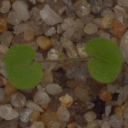

 
Small-flowered Cranesbill


In [ ]:
rcParams['figure.figsize'] = 5,6

#Sample image with its corresponding label
cv2_imshow(images[0])
print(" ")
print(labels['Label'].iloc[0])

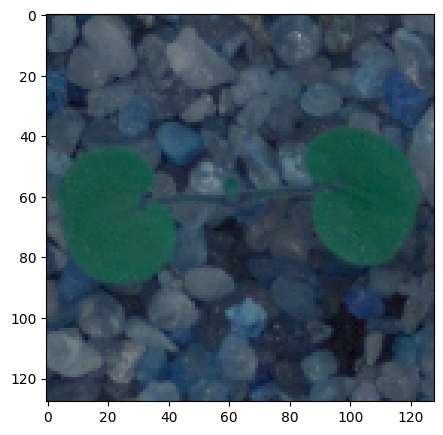

In [ ]:
plt.imshow(images[0]);

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

In [ ]:
#applying medianBlur filter to all images in the dataset and storing in new array
new_images = []
for i in range(len(images_decreased)):
  image = images_decreased[i]
   #image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   #image=cv2.GaussianBlur(image, ksize =(3,3), sigmaX = 0)
  image=cv2.medianBlur(image,5)
  new_images.append(image)
new_images = np.array(new_images)

#### Images after the pre-processing

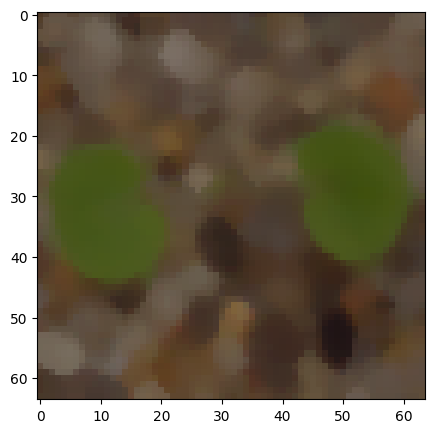

In [ ]:
plt.imshow(new_images[0]);

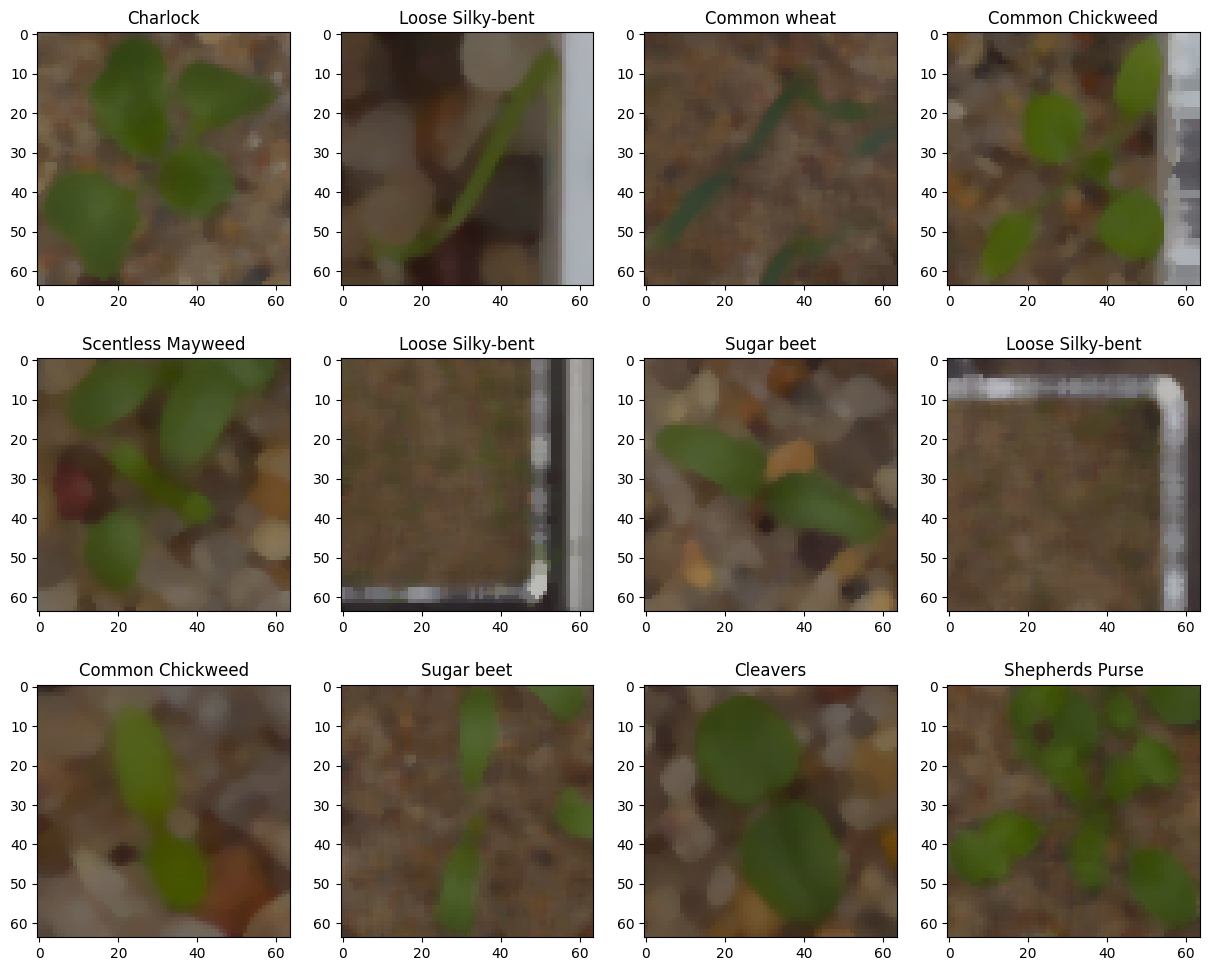

In [ ]:
#sample of 12 images from the dataset after the pre-processing
plot_images(new_images,labels)

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(new_images),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [ ]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_val_encoded.shape

(428, 12)

### Data Normalization

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [ ]:
X_val_normalized.shape

(428, 64, 64, 3)

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1

### Functions

In [ ]:
def plot_model_accuracy(model_history):
  rcParams['figure.figsize'] = 6,6
  plt.plot(model_history.history['accuracy'])
  plt.plot(model_history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  #plt.figure(figsize=(7, 6))
  plt.show();

In [ ]:
#creating a dictionary to map model predictions to each plant's name
class_dict = {0:'Black-grass',
 1:'Charlock',
 2:'Cleavers',
 3:'Common Chickweed',
 4:'Common wheat',
 5:'Fat Hen',
 6:'Loose Silky-bent',
 7:'Maize',
 8:'Scentless Mayweed',
 9:'Shepherds Purse',
 10:'Small-flowered Cranesbill',
 11:'Sugar beet'}

In [ ]:
#listing the names of each class of plant
classes = np.unique(labels).tolist()
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
#storing the number of classes in a variable
num_classes = len(classes)
num_classes


12

In [ ]:
def get_classification_report_confusion_matrix(y_data,y_pred):

  #converting probabilities to class labels
  y_pred_classes1 = np.argmax(y_pred, axis=1)

  #calculating the probability of the predicted class
  y_pred_max_probas1 = np.max(y_pred, axis=1)

  #creating a dataframe of model predictions
  df = pd.DataFrame({"Labels":y_pred_classes1})
  #replacing predictions with plant names
  label_df = df.replace({"Labels":class_dict})
  #converting dataframe to array
  y_pred_classes1 = label_df.to_numpy()

  print("\n")
  print("------------ Model 1: Classification Report on Test Data------------")
  print("\n")

  print(classification_report(y_data, y_pred_classes1))

  print("\n")
  print("------------ Model 1: Confusion Matrix on Test Data ------------")
  print("\n")

  #plotting the heatmap using confusion matrix
  cm = confusion_matrix(y_data, y_pred_classes1)
  plt.figure(figsize=(8,5))
  sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=classes, yticklabels=classes)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  return y_pred_classes1

In [ ]:
def clear_backend():
  backend.clear_session()

  # Fixing the seed for random number generators
  import random
  np.random.seed(42)
  random.seed(42)
  tf.random.set_seed(42)

## Model Building

### Model 1 - Convolutional Neural Network (CNN)

In [ ]:
clear_backend()

In [ ]:
#intializing a sequential model
model_1 = Sequential()

#adding first conv layer with 64 filters, a kernel size of 3x3, and padding as 'same', which provides the same output size as the input size
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3))) #input_shape denotes input image dimension of images
#adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
#adding batch normalization to reduce overfitting
model_1.add(BatchNormalization())

#adding additional layers
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

#flattening the output of the conv layer after max pooling
model_1.add(Flatten())

#adding fully connected dense layers
model_1.add(Dense(64, activation='relu'))
#adding dropout layers to reduce overfitting
model_1.add(Dropout(0.25))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(16, activation='relu'))

#adding the output layer with 12 neurons and activation function of softmax, since this is a multi-class classification problem
model_1.add(Dense(num_classes, activation='softmax'))

#using SGD optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

#compiling model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                        

#### Fitting the model on the train data

In [ ]:
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            #validation_split=0.1,
            #batch_size=32,
            verbose=2
)

Epoch 1/50
121/121 - 7s - loss: 2.2541 - accuracy: 0.2238 - val_loss: 3.5541 - val_accuracy: 0.1379 - 7s/epoch - 59ms/step
Epoch 2/50
121/121 - 1s - loss: 1.8601 - accuracy: 0.3413 - val_loss: 6.8245 - val_accuracy: 0.1379 - 859ms/epoch - 7ms/step
Epoch 3/50
121/121 - 1s - loss: 1.6795 - accuracy: 0.3772 - val_loss: 2.2611 - val_accuracy: 0.2056 - 865ms/epoch - 7ms/step
Epoch 4/50
121/121 - 1s - loss: 1.5558 - accuracy: 0.4401 - val_loss: 1.5890 - val_accuracy: 0.4276 - 1s/epoch - 9ms/step
Epoch 5/50
121/121 - 1s - loss: 1.4405 - accuracy: 0.4796 - val_loss: 11.3217 - val_accuracy: 0.0818 - 1s/epoch - 8ms/step
Epoch 6/50
121/121 - 1s - loss: 1.3339 - accuracy: 0.5259 - val_loss: 4.9436 - val_accuracy: 0.2009 - 1s/epoch - 9ms/step
Epoch 7/50
121/121 - 1s - loss: 1.2659 - accuracy: 0.5667 - val_loss: 8.7122 - val_accuracy: 0.1308 - 866ms/epoch - 7ms/step
Epoch 8/50
121/121 - 1s - loss: 1.1795 - accuracy: 0.5945 - val_loss: 1.7156 - val_accuracy: 0.4813 - 839ms/epoch - 7ms/step
Epoch 9/50

### Model evaluation on training data

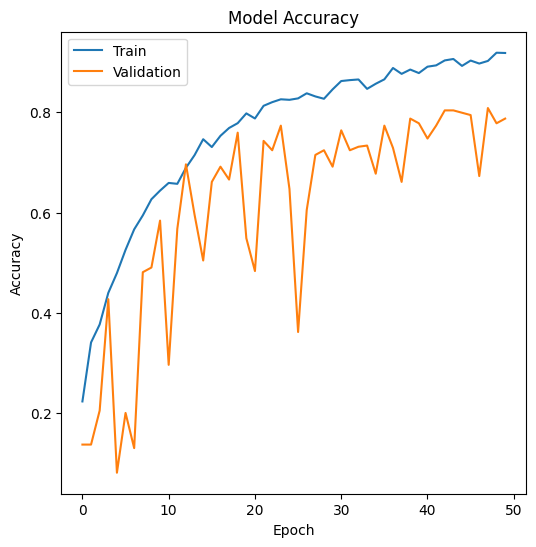

In [ ]:
plot_model_accuracy(history_1)

**Observations:**
* Total 50 epochs :
  * The training accuracy improved to close to 91%
  * The model's performance on the validation accuracy begins improving around the 12th epoch
* It is observed that the model is overfitting the training data and would not improve from additional epochs

### Evaluating the model on test data

In [ ]:
accuracy_1 = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6780 - accuracy: 0.8232 - 284ms/epoch - 19ms/step


### Predictions using test data

In [ ]:
#making predictions on the test data
y_pred_test_1 = model_1.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step




------------ Model 1: Classification Report on Test Data------------


                           precision    recall  f1-score   support

              Black-grass       0.40      0.65      0.50        26
                 Charlock       0.88      0.95      0.91        39
                 Cleavers       0.84      0.90      0.87        29
         Common Chickweed       0.92      0.93      0.93        61
             Common wheat       0.76      0.73      0.74        22
                  Fat Hen       0.88      0.94      0.91        48
         Loose Silky-bent       0.82      0.65      0.72        65
                    Maize       0.82      0.82      0.82        22
        Scentless Mayweed       0.82      0.81      0.82        52
          Shepherds Purse       0.89      0.70      0.78        23
Small-flowered Cranesbill       0.98      0.86      0.91        50
               Sugar beet       0.80      0.84      0.82        38

                 accuracy                           0.

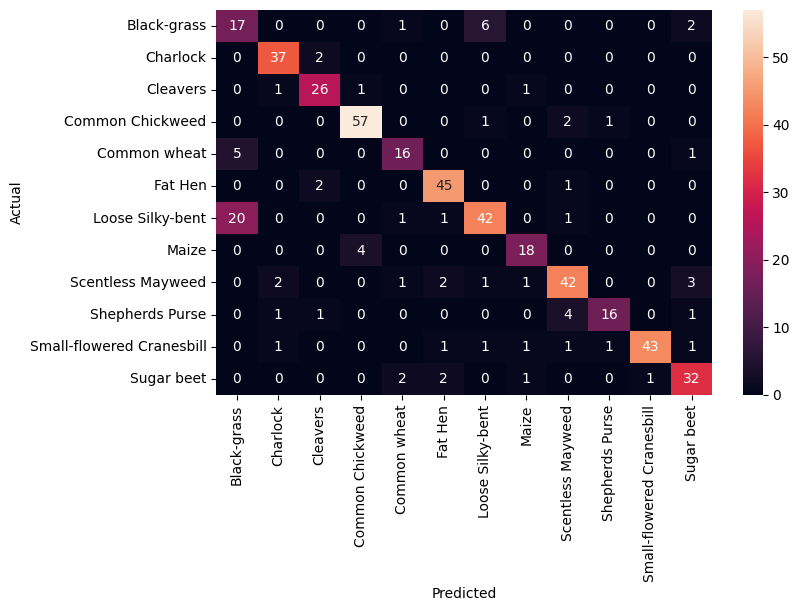

In [ ]:
y_pred_test_classes_1 = get_classification_report_confusion_matrix(y_test,y_pred_test_1)

**Observations:**
* The model achieves 91% accuracy on the training data but only 82% accuracy on the testing data
* Its observe from the classification report and Confusion Matrix that the model performs poorly on identifying certain classes:
  * For example, of the 65 images of Loose Silky-bent, only 42 are identified correctly

## Model 2: Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
clear_backend()

In [ ]:
#Image Data Generator
train_datagen = ImageDataGenerator(horizontal_flip = True,
                              vertical_flip = True,
                              height_shift_range= 0.1,
                              width_shift_range=0.1,
                              rotation_range=20,
                              #zoom_range=0.1,
                              #brightness_range=[0.2,1.0],
                              #shear_range=0.2,
                              fill_mode='nearest')


In [ ]:
#intializing a sequential model
model_2 = Sequential()

#adding first conv layer with 128 filters, a kernel size of 3x3, and padding as 'same', which provides the same output size as the input size
model_2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3))) # Input_shape denotes input image dimension of images
#adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
#adding batch normalization to reduce overfitting
model_2.add(BatchNormalization())

#adding additional layers
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model_2.add(BatchNormalization())

#flattening the output of the conv layer
model_2.add(Flatten())

#adding a fully connected dense layers
model_2.add(Dense(64, activation='relu'))
#adding dropout layers
model_2.add(Dropout(0.25))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(16, activation='relu'))

#adding the output layer with 12 neurons and activation functions as softmax, since this is a multi-class classification problem
model_2.add(Dense(num_classes, activation='softmax'))

#using SGD optimizer
#opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()

#compiling model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                        

### Fitting the model on the train data

In [ ]:
#setting number of epochs
epochs = 50
#setting the batch size of the generator
batch_size = 20

history_2 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_test_normalized,y_test_encoded),
                    verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/50
192/192 [==============================] - 9s 33ms/step - loss: 2.2345 - accuracy: 0.2524 - val_loss: 4.6414 - val_accuracy: 0.1368 - lr: 0.0010
Epoch 2/50
192/192 [==============================] - 6s 32ms/step - loss: 1.7660 - accuracy: 0.3977 - val_loss: 2.7809 - val_accuracy: 0.0779 - lr: 0.0010
Epoch 3/50
192/192 [==============================] - 6s 29ms/step - loss: 1.5117 - accuracy: 0.4693 - val_loss: 10.1863 - val_accuracy: 0.1032 - lr: 0.0010
Epoch 4/50
192/192 [==============================] - 7s 35ms/step - loss: 1.4105 - accuracy: 0.5247 - val_loss: 1.2935 - val_accuracy: 0.5326 - lr: 0.0010
Epoch 5/50
192/192 [==============================] - 6s 29ms/step - loss: 1.3018 - accuracy: 0.5605 - val_loss: 1.2967 - val_accuracy: 0.5516 - lr: 0.0010
Epoch 6/50
192/192 [==============================] - 7s 36ms/step - loss: 1.2303 - accuracy: 0.5743 - val_loss: 1.6514 - val_accuracy: 0.5032 - lr: 0.0010
Epoch 7/50
192/192 [==============================] - 5s 28ms/s

### Model evaluation on training data

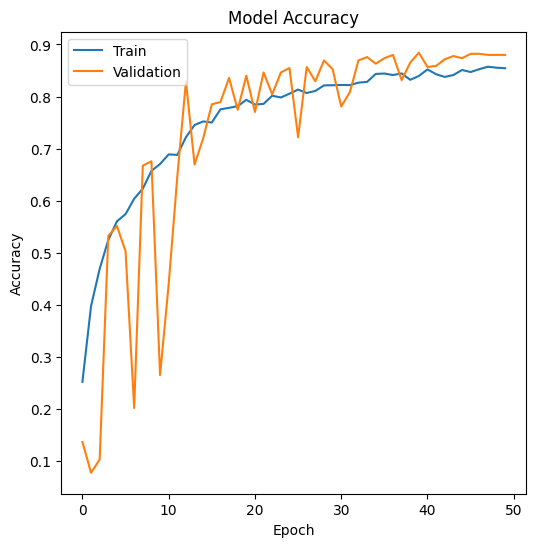

In [ ]:
plot_model_accuracy(history_2)

**Observations:**
* Total 50 epochs:
  * The training accuracy gradually improved to close to 85%
  * From around the 12th epoch, the model's performance on the validation accuracy shows improvement but is highly volatile

### Evaluating the model on test data

In [ ]:
accuracy_2 = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.3924 - accuracy: 0.8800 - 95ms/epoch - 6ms/step


### Predictions using test data

In [ ]:
#making predictions on the test data
y_pred_test_2 = model_2.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step




------------ Model 1: Classification Report ------------


                           precision    recall  f1-score   support

              Black-grass       0.50      0.19      0.28        26
                 Charlock       0.93      0.95      0.94        39
                 Cleavers       0.86      0.86      0.86        29
         Common Chickweed       0.97      0.92      0.94        61
             Common wheat       0.82      0.82      0.82        22
                  Fat Hen       0.92      0.94      0.93        48
         Loose Silky-bent       0.73      0.94      0.82        65
                    Maize       0.92      1.00      0.96        22
        Scentless Mayweed       0.86      0.96      0.91        52
          Shepherds Purse       0.84      0.70      0.76        23
Small-flowered Cranesbill       0.96      0.92      0.94        50
               Sugar beet       0.97      0.87      0.92        38

                 accuracy                           0.87       475

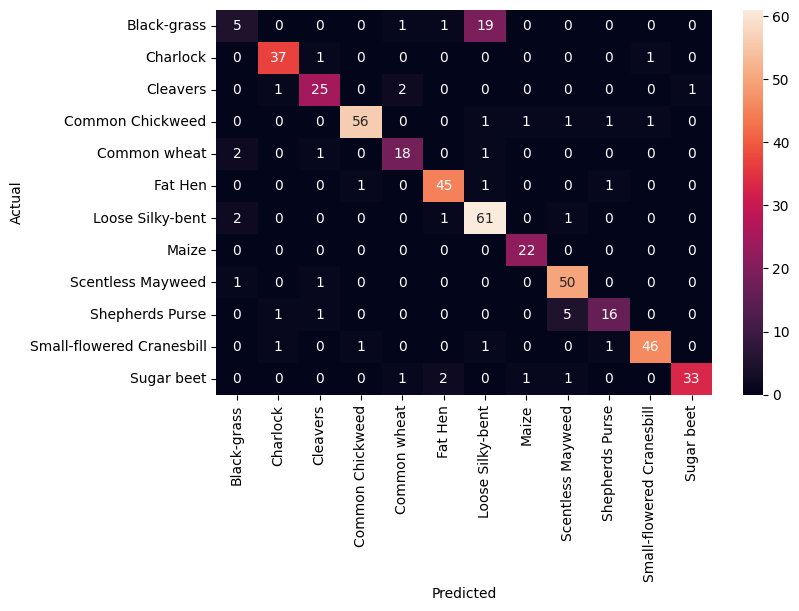

In [ ]:
y_pred_test_classes_2 = get_classification_report_confusion_matrix(y_test,y_pred_test_2)

**Observations:**
* Overall, our additions have improved the CNN's performance
  * The model achieves 87% accuracy on the testing data
* Its observe from the classification report and Confusion Matrix that the model performs well on identifying certain classes
  * For example, of the 65 images of Loose Silky-bent, 62 images are identified correctly

* **Note:** Images of Black-grass and Loose Silky-bent may exhibit similarities in their visual appearance

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [ ]:
#creating list of predictions for all models generated
y_pred_tests = [y_pred_test_classes_1,y_pred_test_classes_2]

modelx = 1

#generating classification reports for all models
for y_pred in y_pred_tests:
  print("---"*20)
  print("Model "+str(modelx),":")
  print(classification_report(y_test,y_pred))
  print(" ")
  modelx+=1

------------------------------------------------------------
Model 1 :
                           precision    recall  f1-score   support

              Black-grass       0.40      0.65      0.50        26
                 Charlock       0.88      0.95      0.91        39
                 Cleavers       0.84      0.90      0.87        29
         Common Chickweed       0.92      0.93      0.93        61
             Common wheat       0.76      0.73      0.74        22
                  Fat Hen       0.88      0.94      0.91        48
         Loose Silky-bent       0.82      0.65      0.72        65
                    Maize       0.82      0.82      0.82        22
        Scentless Mayweed       0.82      0.81      0.82        52
          Shepherds Purse       0.89      0.70      0.78        23
Small-flowered Cranesbill       0.98      0.86      0.91        50
               Sugar beet       0.80      0.84      0.82        38

                 accuracy                           0.82

### **Final Model Selection**

* Based on the evaluation metrics and analysis, **Model 2** appears to be the best choice for the final model selection
* Model 2 has demonstrated exceptional performance with a recall rate of 87%, precision of 86%, and an F1-score of 84%
* These metrics indicate its ability to effectively identify and classify plant seedlings, meeting our requirements for accuracy and reliability

### Visualizing the prediction

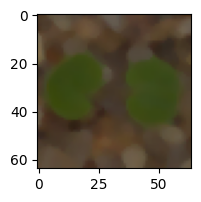

1/1 [==============================] - 0s 34ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill
------------------------------------------------------------


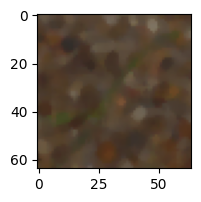

1/1 [==============================] - 0s 27ms/step
Predicted Label: ['Loose Silky-bent']
True Label: Loose Silky-bent
------------------------------------------------------------


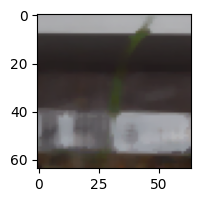

1/1 [==============================] - 0s 39ms/step
Predicted Label: ['Loose Silky-bent']
True Label: Black-grass
------------------------------------------------------------


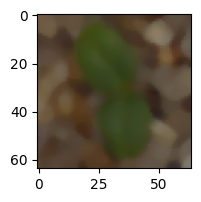

1/1 [==============================] - 0s 38ms/step
Predicted Label: ['Cleavers']
True Label: Cleavers
------------------------------------------------------------


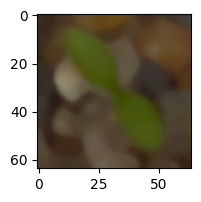

1/1 [==============================] - 0s 34ms/step
Predicted Label: ['Common Chickweed']
True Label: Common Chickweed
------------------------------------------------------------


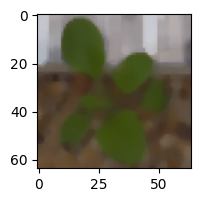

1/1 [==============================] - 0s 53ms/step
Predicted Label: ['Shepherds Purse']
True Label: Shepherds Purse
------------------------------------------------------------


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label:', enc.inverse_transform(model_2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label:', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector
print("---"*20)

plt.figure(figsize=(2,2))
plt.imshow(X_test[7])
plt.show()
print('Predicted Label:', enc.inverse_transform(model_2.predict((X_test_normalized[7].reshape(1,64,64,3)))))
print('True Label:', enc.inverse_transform(y_test_encoded)[7])
print("---"*20)

plt.figure(figsize=(2,2))
plt.imshow(X_test[17])
plt.show()
print('Predicted Label:', enc.inverse_transform(model_2.predict((X_test_normalized[17].reshape(1,64,64,3)))))
print('True Label:', enc.inverse_transform(y_test_encoded)[17])
print("---"*20)

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label:', enc.inverse_transform(model_2.predict((X_test_normalized[33].reshape(1,64,64,3)))))
print('True Label:', enc.inverse_transform(y_test_encoded)[33])
print("---"*20)

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
print('Predicted Label:', enc.inverse_transform(model_2.predict((X_test_normalized[59].reshape(1,64,64,3)))))
print('True Label:', enc.inverse_transform(y_test_encoded)[59])
print("---"*20)

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label:', enc.inverse_transform(model_2.predict((X_test_normalized[36].reshape(1,64,64,3)))))
print('True Label:', enc.inverse_transform(y_test_encoded)[36])
print("---"*20)




## Actionable Insights and Business Recommendations

### **Actionable Insights**
* **Feature Importance:** Certain features such as leaf shape, color, and texture have shown to be crucial in distinguishing between different plant species. By focusing on these features, we can improve the accuracy of our classification model.
* **Data Augmentation:** Augmenting our dataset with techniques such as rotation, flipping, and scaling can help in increasing the diversity of our training data. This can lead to better generalization and performance of our classification model.
* **Model Selection:** After evaluation, we have identified Model 2 as the most suitable candidate for classifying plant seedlings. With a recall rate of 87%, precision of 86%, and an F1-score of 84%, Model 2 demonstrates superior performance compared to other models.
* **Continuous Monitoring:** It is essential to continuously monitor the performance of our classification model and fine-tune it as needed. Regular validation and testing will ensure that our model remains accurate and robust over time.

By implementing these insights, we can enhance the effectiveness of our plant seedling classification system and achieve our objectives more efficiently.

### **Business Recommendations**
* **Improve Data Collection:** To further enhance the accuracy and robustness of our classification model, we recommend expanding our dataset to include a more diverse range of plant species and variations. This will ensure that our model is well-trained to handle various scenarios and challenges.
* **Invest in Model Optimization:** As our classification model is a critical component, we should allocate resources to optimize and fine-tune it continuously. This includes experimenting with different architectures, hyperparameters, and regularization techniques to achieve the best possible performance.
* **Enhance User Experience:** Consider integrating our classification model into user-friendly applications or platforms that allow stakeholders to easily access and utilize the results. This will improve user satisfaction and adoption of our solution, leading to better engagement and outcomes.
* **Collaboration and Knowledge Sharing:** Encourage collaboration and knowledge sharing among team members, domain experts, and stakeholders involved in the project. By fostering a culture of collaboration, we can leverage collective expertise and insights to drive innovation and success.
* **Monitor and Evaluate:** Implement a robust monitoring and evaluation framework to track the performance of our classification model continuously. Regularly assess key metrics such as accuracy, precision, recall, and F1-score to identify areas for improvement and optimization.